In [1]:
import pandas as pd
import numpy as np

#### Reading data

In [2]:
df_sales = pd.read_csv('sales.csv')
df_sales.head()

,date,sales_amount,product_id,units_sold,store_location
0,"April 06, 2023",high,P003,NaN,NaN
1,2023-01-04,6727.63,P003,28.0,London
2,2023-02-11,8208.54,P002,36.0,New York
3,2023-02-03,7094.52,NaN,26.0,Houston
4,2023-04-21,6160.3,P008,8.0,Houston


In [3]:
df_weather = pd.read_csv('weather.csv')
df_weather.head()

,date,Temp,humidity(%),wind_speed,city
0,06/04/2023,hot,NaN,fast,Chicago
1,2023-01-04,24.4,56.0,15.37,NaN
2,2023-02-11,38.8,70.0,0.87,NaN
3,2023-02-03,33.3,63.0,19.89,NaN
4,2023-04-21,30,43.0,9.4,New York


#### Cleaning and Transforming

#### Sales Data

In [4]:
df_sales.shape

(152, 5)

#### replacing str values like 'High' from 'sales_amount' column with median and changing column's name to 'sales'

In [5]:
df_sales['sales_amount'].dtype

dtype('O')

In [6]:
df_sales['sales_amount'].unique()

array(['high', '6727.63', '8208.54', '7094.52', '6160.3', '2156.5',
       '8300.84', '8385.76', '6633.46', '8383.84', '6863.36', '2860.16',
       '3465.65', '2931.3', '4395.33', '1350.67', '6564.28', '4028.99',
       '6901.5', '4468.57', '7134.52', '4065.62', '3346.25', '5464.34',
       '7236.01', '4135.03', '9429.83', '1352.68', '4761.51', '9708.22',
       '5931.75', '4811.24', '6116.68', '6183.32', '7584.83', '2149.21',
       '3250.15', '6224.9', '8804.05', '6056.8', '3147.37', '7118.6',
       '7659.18', '3144.13', '4399.56', '5808.95', '5469.05', '4506.56',
       '3678.72', '1899.86', '1481.37', '9626.87', '8624.29', '4194.15',
       '9611.21', '7090.93', '5342.69', '5437.23', '1749.56', '1825.34',
       '6421.97', '5983.33', '2914.55', '9515.75', '8031.66', '2021.18',
       '9378.36', '9768.23', '9963.38', '1502.84', '7633.32', '5913.24',
       '7352.48', '9717.87', '7192.27', '8532.67', '8801.82', '8546.33',
       '4834.82', '3003.19', '4569.86', '9027.07', '2319.44',

In [7]:
df_sales['sales_amount'].replace('high', 0, inplace=True)

/tmp/ipykernel_10566/3797298442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['sales_amount'].replace('high', 0, inplace=True)


In [8]:
df_sales['sales_amount'].replace(0, df_sales['sales_amount'].median(), inplace=True)

/tmp/ipykernel_10566/3556426372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['sales_amount'].replace(0, df_sales['sales_amount'].median(), inplace=True)


In [9]:
df_sales['sales'] = pd.to_numeric(df_sales['sales_amount'])

In [10]:
df_sales = df_sales.drop('sales_amount', axis=1)

#### renaming 'units_sold' to 'quantity' and 'store_location' to 'city'

In [11]:
df_sales['units_sold'].dtype

dtype('float64')

In [12]:
df_sales.rename(columns={'units_sold' : 'quantity', 'store_location' : 'city'}, inplace=True)

#### cleaning 'date' column and creating a new 'month' column from 'date'

In [13]:
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%m-%d', errors='coerce')

In [14]:
# df_sales['date'] = df_sales['date'].dt.strftime('%d/%m/%Y')

In [15]:
df_sales['date'].isna().sum() 

np.int64(25)

In [16]:
df_sales['month'] = df_sales['date'].dt.month_name()

In [17]:
df_sales

,date,product_id,quantity,city,sales,month
0,NaT,P003,NaN,NaN,5389.96,NaN
1,2023-01-04,P003,28.0,London,6727.63,January
2,2023-02-11,P002,36.0,New York,8208.54,February
3,2023-02-03,NaN,26.0,Houston,7094.52,February
4,2023-04-21,P008,8.0,Houston,6160.30,April
...,...,...,...,...,...,...
147,2023-04-20,p001,34.0,Houston,4550.70,April
148,2023-01-31,p001,6.0,Houston,1960.80,January
149,2023-02-16,P007,2.0,Paris,4020.94,February
150,2023-02-11,P002,36.0,New York,8208.54,February


#### finding and dropping duplicates

In [18]:
df_sales[df_sales.duplicated()]

,date,product_id,quantity,city,sales,month
150,2023-02-11,P002,36.0,New York,8208.54,February
151,2023-02-03,NaN,26.0,Houston,7094.52,February


In [19]:
df_sales = df_sales.drop_duplicates()

In [20]:
df_sales.isnull().sum()

date          25
product_id    19
quantity      17
city          61
sales          0
month         25
dtype: int64

#### Handling null values in each column by randomly substituting them

In [21]:
import random

##### 'product_id'

In [22]:
product_id_list = list(df_sales['product_id'].unique())

In [23]:
random.choice(product_id_list)

nan

In [24]:
df_sales['product_id'].fillna(random.choice(product_id_list), inplace=True)

/tmp/ipykernel_10566/1803863322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['product_id'].fillna(random.choice(product_id_list), inplace=True)
/tmp/ipykernel_10566/1803863322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['product_id'].fillna(random.choice(product_id_list), inplace=True)


##### 'city'

In [25]:
city_list = list(df_sales['city'].unique())

In [26]:
df_sales['city'].fillna(random.choice(city_list), inplace=True)

/tmp/ipykernel_10566/945314197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['city'].fillna(random.choice(city_list), inplace=True)
/tmp/ipykernel_10566/945314197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['city'].fillna(random.choice(city_list), inplace=True)


##### quantity

In [27]:
df_sales['quantity'].fillna(0, inplace=True)

/tmp/ipykernel_10566/825631530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['quantity'].fillna(0, inplace=True)
/tmp/ipykernel_10566/825631530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['quantity'].fillna(0, inplace=True)


##### date

In [28]:
date_list = list(df_sales['date'].unique())

In [29]:
df_sales['date'].fillna(random.choice(date_list), inplace=True)

/tmp/ipykernel_10566/139737404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['date'].fillna(random.choice(date_list), inplace=True)
/tmp/ipykernel_10566/139737404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['date'].fillna(random.choice(date_list), inplace=True)


##### month

In [30]:
df_sales['month'].fillna(random.choice(['January', 'February', 'April', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']), inplace=True)

/tmp/ipykernel_10566/3245856864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sales['month'].fillna(random.choice(['January', 'February', 'April', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']), inplace=True)
/tmp/ipykernel_10566/3245856864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

#### rechecking for null values

In [31]:
df_sales.isna().sum()

date          0
product_id    0
quantity      0
city          0
sales         0
month         0
dtype: int64

#### checking dtype of columns

In [32]:
df_sales.dtypes

date          datetime64[ns]
product_id            object
quantity             float64
city                  object
sales                float64
month                 object
dtype: object

#### Weather data

In [33]:
df_weather.head()

,date,Temp,humidity(%),wind_speed,city
0,06/04/2023,hot,NaN,fast,Chicago
1,2023-01-04,24.4,56.0,15.37,NaN
2,2023-02-11,38.8,70.0,0.87,NaN
3,2023-02-03,33.3,63.0,19.89,NaN
4,2023-04-21,30,43.0,9.4,New York


In [34]:
df_weather.dtypes

date            object
Temp            object
humidity(%)    float64
wind_speed      object
city            object
dtype: object

In [35]:
df_weather.isna().sum()

date            0
Temp            0
humidity(%)    23
wind_speed      0
city           59
dtype: int64

#### filling NaN values

##### city

In [36]:
df_weather['city'].fillna(random.choice(city_list), inplace = True)

/tmp/ipykernel_10566/1925354865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['city'].fillna(random.choice(city_list), inplace = True)


##### humidity

In [37]:
df_weather['humidity(%)'].fillna(0, inplace=True)

/tmp/ipykernel_10566/2767530713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['humidity(%)'].fillna(0, inplace=True)


##### temp : converting type + filling NaN

In [38]:
df_weather['Temp'] = pd.to_numeric(df_weather['Temp'], errors='coerce')

In [39]:
df_weather['Temp'].fillna(0, inplace=True)

/tmp/ipykernel_10566/1538674686.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['Temp'].fillna(0, inplace=True)


##### wind_speed: converting dtype + filling NaN

In [40]:
df_weather['wind_speed'] =  pd.to_numeric(df_weather['wind_speed'], errors='coerce')

In [41]:
df_weather['wind_speed'].fillna(0, inplace=True)

/tmp/ipykernel_10566/570146657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['wind_speed'].fillna(0, inplace=True)


##### date: type change

In [42]:
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%Y-%m-%d', errors='coerce')

In [43]:
df_weather['date'].fillna(random.choice(date_list), inplace=True)

/tmp/ipykernel_10566/3139859760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather['date'].fillna(random.choice(date_list), inplace=True)


#### Rechecking dtypes and nulls

In [44]:
df_weather.dtypes

date           datetime64[ns]
Temp                  float64
humidity(%)           float64
wind_speed            float64
city                   object
dtype: object

In [45]:
df_weather.isnull().sum()

date           0
Temp           0
humidity(%)    0
wind_speed     0
city           0
dtype: int64

#### Deriving buisness insights

In [46]:
df_merged = df_sales.set_index('date').join(df_weather.set_index('date'), lsuffix='_sales', rsuffix='_weather')

In [47]:
df_merged

,product_id,quantity,city_sales,sales,month,Temp,humidity(%),wind_speed,city_weather
date,,,,,,,,,
2023-05-21,P003,0.0,California,5389.96,October,22.8,78.0,1.02,New York
2023-01-04,P003,28.0,London,6727.63,January,24.4,56.0,15.37,New York
2023-01-04,P003,28.0,London,6727.63,January,15.5,71.0,11.06,Los Angeles
2023-01-04,P003,28.0,London,6727.63,January,24.4,56.0,15.37,New York
2023-02-11,P002,36.0,New York,8208.54,February,38.8,70.0,0.87,New York
...,...,...,...,...,...,...,...,...,...
2023-04-20,p001,34.0,Houston,4550.70,April,27.9,89.0,7.17,New York
2023-04-20,p001,34.0,Houston,4550.70,April,19.6,86.0,11.58,Los Angeles
2023-04-20,p001,34.0,Houston,4550.70,April,15.2,0.0,18.88,Chicago


### Month-wise Revenue

In [48]:
df_merged['revenue'] = df_merged['sales'] * df_merged['quantity']

In [49]:
df_merged.groupby('month')['revenue'].sum()

month
April       3543976.17
February    8646841.12
January     5213928.99
March       8592953.81
May         4094945.02
October     1864565.80
Name: revenue, dtype: float64

### Weekly Revenue

In [50]:
weekly_revenue_list = df_merged['revenue'].resample('W').sum()

In [51]:
weekly_revenue_list.reset_index()

,date,revenue
0,2023-01-01,810354.60
1,2023-01-08,1218351.34
2,2023-01-15,2078640.39
3,2023-01-22,446553.26
4,2023-01-29,617073.75
5,2023-02-05,2073562.93
6,2023-02-12,4335197.57
7,2023-02-19,1108360.78
8,2023-02-26,944700.99
9,2023-03-05,1457022.20


### Which city has max sale?

In [52]:
df_merged_by_city = df_sales.set_index('city').join(df_weather.set_index('city'), lsuffix='_sales', rsuffix='_weather')

In [53]:
city_wise_sales = df_merged_by_city.groupby('city')['sales'].sum()

In [54]:
city_wise_sales

city
California     1588814.32
Chicago        2902815.28
Houston         638793.45
London          126148.35
MexicoCIty        5797.61
New York      10706895.63
Paris            65910.05
Name: sales, dtype: float64

In [55]:
city_wise_sales.idxmax()

'New York'

### which city has 2nd highest sales?

In [56]:
city_wise_sales_sorted = city_wise_sales.sort_values(ascending=False).reset_index()

In [57]:
city_wise_sales_sorted.loc[1]

city        Chicago
sales    2902815.28
Name: 1, dtype: object

### Analyse effect of temp on sales

<Axes: xlabel='Temp'>

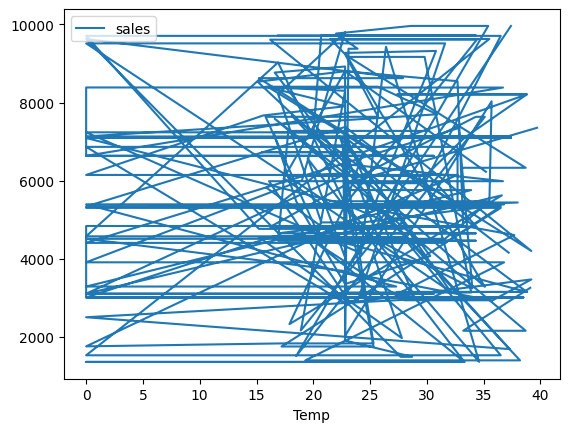

In [58]:
df_merged.plot(x='Temp', y='sales')

### City-wise which product has highest sale? return: [city, product, amount]

In [59]:
df_merged_by_city['revenue'] = df_merged_by_city['sales'] * df_merged_by_city['quantity']

In [60]:
city_product_sales = df_merged_by_city.groupby(['city','product_id'])['revenue'].sum().reset_index()

In [61]:
city_max_revenue_idx = city_product_sales.groupby('city')['revenue'].idxmax()

In [62]:
city_max_revenue_idx

city
California     2
Chicago        9
Houston       15
London        20
MexicoCIty    22
New York      25
Paris         30
Name: revenue, dtype: int64

In [63]:
city_product_sales.loc[city_max_revenue_idx]

,city,product_id,revenue
2,California,P003,11900277.04
9,Chicago,P003,12604331.59
15,Houston,P002,4379192.15
20,London,P003,2032342.00
22,MexicoCIty,P016,186696.69
25,New York,P002,70883809.50
30,Paris,P003,832016.10


#### Using rolling statics

In [75]:
df_merged['Temp'].resample('W').mean()

date
2023-01-01    21.650000
2023-01-08    24.666667
2023-01-15    16.433333
2023-01-22    29.833333
2023-01-29    24.560000
2023-02-05    26.584211
2023-02-12    25.407143
2023-02-19    23.333333
2023-02-26    22.557143
2023-03-05    15.755556
2023-03-12    32.800000
2023-03-19    20.650000
2023-03-26    21.630769
2023-04-02    28.250000
2023-04-09    22.808333
2023-04-16    27.375000
2023-04-23    23.775000
2023-04-30    26.471429
2023-05-07    19.166667
2023-05-14    21.786667
2023-05-21    22.255172
2023-05-28    25.487500
2023-06-04    16.600000
Freq: W-SUN, Name: Temp, dtype: float64